<a href="https://colab.research.google.com/github/RushikeshBhabad/MachineLearning/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install category-encoders

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [63]:
import warnings

warnings.filterwarnings('ignore')

In [64]:
data = '/content/car_evaluation.csv'

df = pd.read_csv(data, header=None)

## ***Car Acceptability Dataset***

This dataset contains information about car acceptability based on various technical and comfort-related features.

###### Features

###### **1. PRICE (Overall Price)**
   - **buying**: Buying price of the car  
   - **maint**: Maintenance cost of the car  

###### **2. TECH (Technical Characteristics)**

###### **3. COMFORT (Comfort-Related Features)**
   - **doors**: Number of doors  
   - **persons**: Passenger capacity (number of persons the car can carry)  
   - **lug_boot**: Size of luggage boot  

###### **4. safety**: Estimated safety of the car  

###### **Target Variable**
   - **CAR**: Car acceptability (classification label)

---
---

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

Attribute Information:

**Class Values:**

**unacc, acc, good, vgood**

**Attributes:**

buying: vhigh, high, med, low.

maint: vhigh, high, med, low.

doors: 2, 3, 4, 5more.

persons: 2, 4, more.

lug_boot: small, med, big.

safety: low, med, high.

In [65]:
df.shape

(1728, 7)

In [66]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [67]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [68]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [70]:
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


In [71]:
X = df.drop(['class'], axis=1)
y = df['class']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [73]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [74]:
# import category encoders
import category_encoders as ce

In [75]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [76]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [77]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [91]:
from sklearn.preprocessing import LabelEncoder

# Assume df is your dataset
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])  # Encode the output column


In [93]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode each categorical column
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])  # Convert categorical to numeric

print(df.head())  # Check if encoding worked


   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


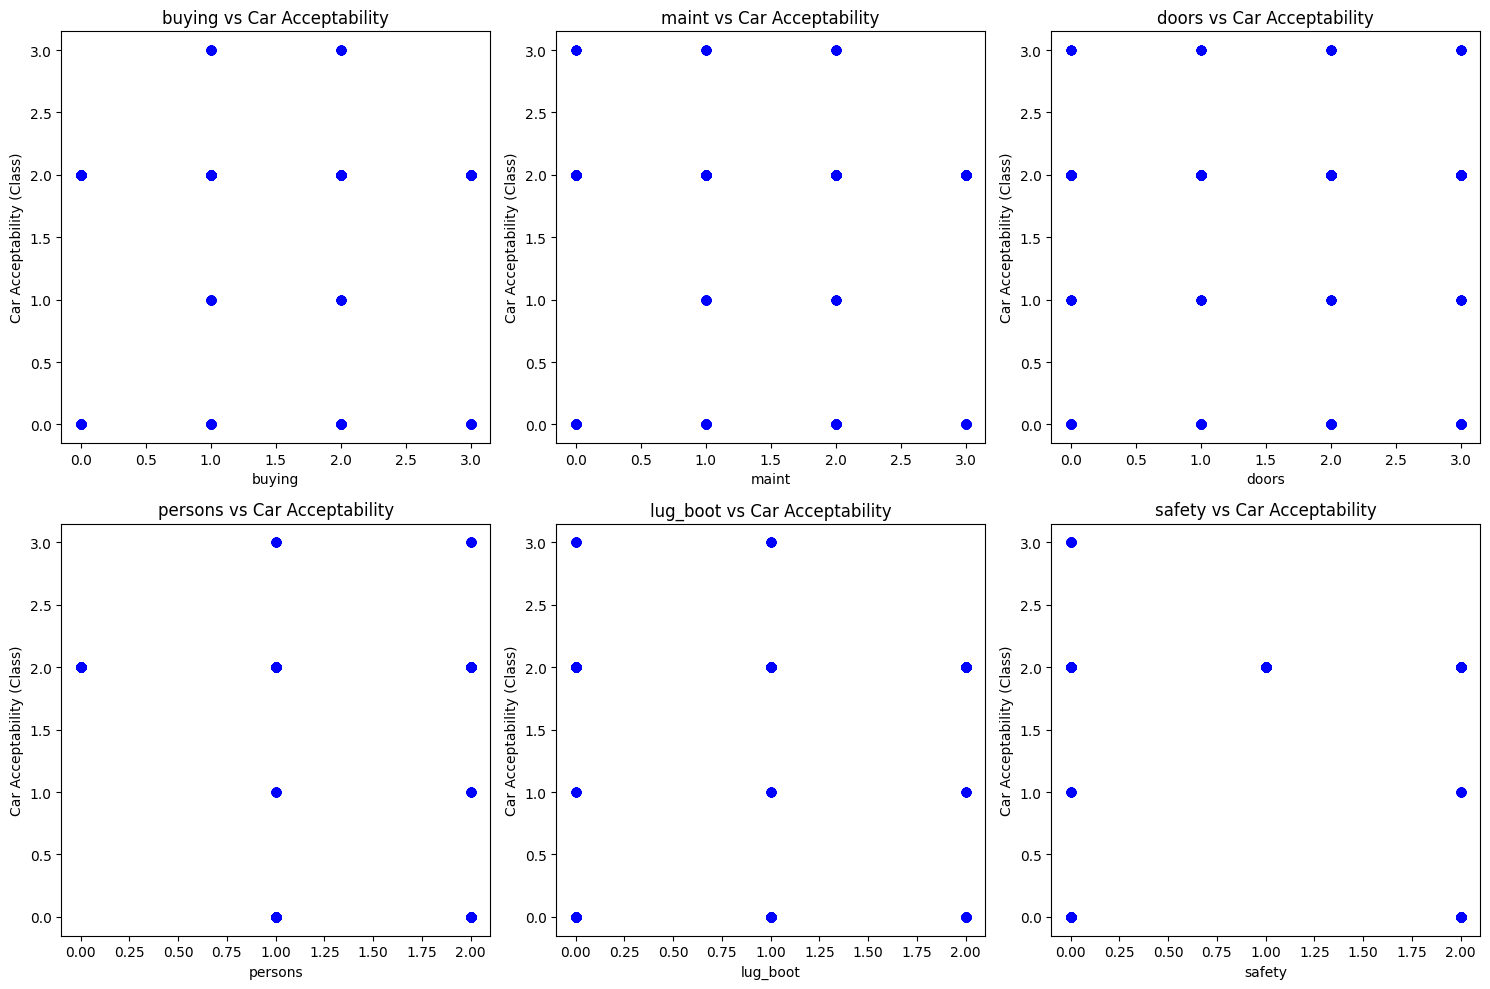

In [96]:
import matplotlib.pyplot as plt

features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

# Create subplots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
    plt.scatter(df[feature], df['class'], color='blue')
    plt.xlabel(feature)
    plt.ylabel("Car Acceptability (Class)")
    plt.title(f"{feature} vs Car Acceptability")

plt.tight_layout()
plt.show()


In [78]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.9457


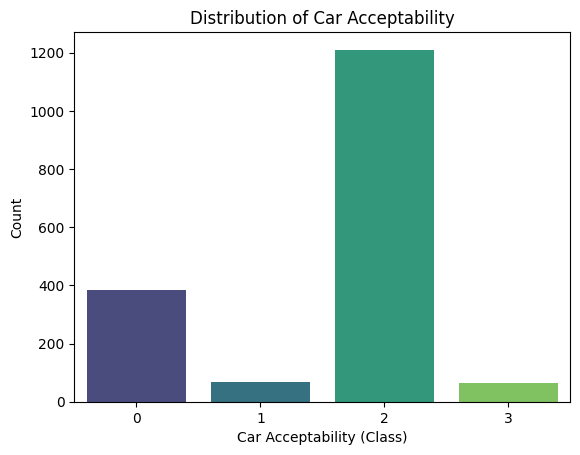

In [97]:
import seaborn as sns

sns.countplot(x=df['class'], palette="viridis")
plt.xlabel("Car Acceptability (Class)")
plt.ylabel("Count")
plt.title("Distribution of Car Acceptability")
plt.show()
# In your bar chart, the highest count is for class 2, which means most cars in your dataset are classified as "Good".

In [79]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# n_estimators=100 → Creates 100 decision trees

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


In [80]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [81]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

,0
safety,0.295319
persons,0.233856
buying,0.151734
maint,0.146653
lug_boot,0.100048
doors,0.072389


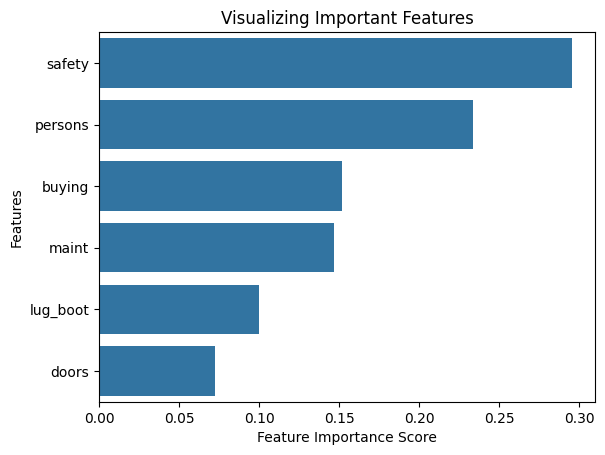

In [82]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

plt.show()

**XGBoost (Extreme Gradient Boosting) 📊⚡**

XGBoost is an optimized machine learning algorithm based on gradient boosting. It is widely used for classification, regression, and ranking problems, particularly in structured/tabular datasets.

🔹 Key Features

Boosting Algorithm: Uses ensemble learning by combining weak models (decision trees) to make a strong model.

Regularization: Includes L1 (Lasso) and L2 (Ridge) regularization to reduce overfitting.

Parallel Processing: Fast and optimized, utilizing multiple CPU cores for training.

Handling Missing Values: Automatically manages missing values efficiently.

Scalability: Works efficiently with large datasets.

🔹 Advantages

✔ High Accuracy: Often outperforms other ML models on tabular data.

✔ Speed: Faster than other gradient boosting implementations like AdaBoost and standard GBM.

✔ Feature Importance: Provides built-in methods to analyze important features.

✔ Wide Adoption: Used in many Kaggle competitions and real-world applications.



In [83]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [84]:
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)  # Encode y_test similarly

# Now, fit the model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [85]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98
